Credits/Course URL - https://www.udemy.com/course/the-ultimate-beginners-guide-to-natural-language-processing/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import en_core_web_sm
import random
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

### Sentiment Analysis using Twitter Data

In [2]:
tweets = pd.read_csv('Datasets/tweets.csv', 
                     low_memory=False, 
                     encoding = 'latin1', 
                     header=None,
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

In [3]:
tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [6]:
tweets_processed = tweets.copy(deep=True)

In [7]:
tweets_processed = tweets_processed.drop(['id', 'date', 'query', 'user'], axis = 1)

In [8]:
tweets_processed.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
X_ = tweets_processed['text'].values
y_ = tweets_processed['sentiment'].values

In [10]:
X, X_, y, y_ = train_test_split(X_, y_, test_size=0.90, random_state=42)

In [11]:
X.shape, y.shape

((160000,), (160000,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, y_train.shape

((120000,), (120000,))

In [14]:
X_test.shape, y_test.shape

((40000,), (40000,))

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 4]), array([59903, 60097]))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 4]), array([20132, 19868]))

In [17]:
nlp = spacy.load('en_core_web_sm')
nlp

In [18]:
def preprocessing(sentence):
    
    sentence = sentence.lower()
    sentence = re.sub(r"@[A-Za-z0-9]+", '', sentence)
    sentence = re.sub(r"https?://[A-Za-z0-9/.-]+", '', sentence)
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('[', '')
    sentence = sentence.replace(']', '')
    
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    
    tokens = ' '.join(tokens)
    return tokens

In [19]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [20]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [21]:
for cnt in range(10):
    print(X_train_cleaned[random.randint(0, len(X_train_cleaned)-1)])

frantically tidying flat family swain arrive today literally hour achieve impossible uh oh
dread tonight dinner
lowes menardsbeing homeowner expensive
day saw mets got spanked nats surprise wanna rochester tomorrow
got hear live stream cool love love twitter
wow away whilestupid lap shopstill hope
yeah short yeahh got time haha
looks like snowing outside snow usually fuzzy breathe
mami welpp lips soft soooo
tired wanna sleep


In [22]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

In [23]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

chillingg
thanks bath time bed time toddler looks like wo watching e3 press conf live year
great job
got finished watching sexy spec vid 1000th time man sexytoo bad gay
comment pic
bff massage therapist miracles pain
hardest saying goodbye
checking season quot;high&quot;lights rolling sour diesel blunt li'l hash groovy
blood day definitelyi wish live sea nice
realz quot;houseguest&quot def irritating person umi pool night hear dogfrog


In [24]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

ellen miss stuck rents tonight bc oh come soon
warn change username tweeted old
twitter whew stop holding breath
diet coke mentos thing
ok 3:15am asleep going zombie later today
late mischievous pixies kept feeling good busy busy
worry got dozen sitters
wish balloon shirt maybe shall
eeeeek sorry katie got
year time passing fast miss th


In [25]:
X_train_cleaned[:5]

['bellachica ok lol feel bigger ugh gon na cook',
 'glasses hot girls',
 'time bike 2day lousy day',
 'wow â£155 administration charge having good day bloody hidden charges',
 'too- unfortunately nt magically transported nineties hoped']

In [26]:
X_train_cleaned_concatd = ' '.join(X_train_cleaned)

In [27]:
X_test_cleaned_concatd = ' '.join(X_test_cleaned)

### Wordcloud

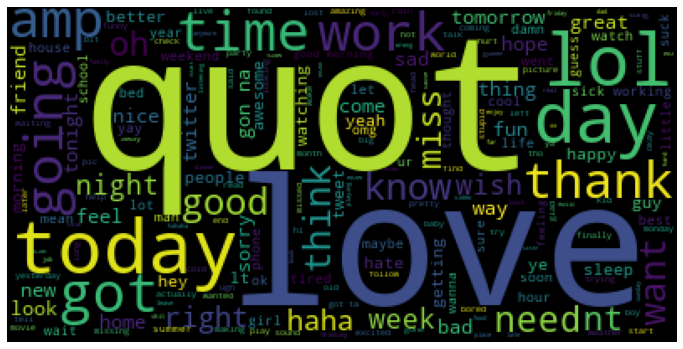

In [28]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_train_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off');

### Detecting Laguages

In [29]:
detect('lets see which language is this!')

'en'

In [30]:
#lang_X_train = [detect(langu) for langu in X_train_cleaned if langu]

lang_X_train = []

for index, tweet in enumerate(X_train_cleaned):
    try:
        if len(tweet) != 0:
            lang = detect(tweet)
            lang_X_train.append(lang)
        else:
            lang_X_train.append('EMPTY TWEET')
    except:
        print(f"Exception Encountered at position {index}: {tweet}")        
        lang_X_train.append('UNKNOWN LANG : '+ str(tweet))
        pass

Exception Encountered at position 17775: 4:30
Exception Encountered at position 79561: 12:28


In [31]:
np.unique(lang_X_train, return_counts=True)

(array(['EMPTY TWEET', 'UNKNOWN LANG : 12:28', 'UNKNOWN LANG : 4:30', 'af',
        'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr', 'hr',
        'hu', 'id', 'it', 'ko', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi'], dtype='<U20'),
 array([  808,     1,     1,  6709,   758,   207,  2031,  1606,   314,
        84874,   717,  1513,   730,  1824,   310,   120,  1170,  1309,
            2,   111,    74,  2273,  1882,   713,   341,   804,   330,
          427,  3578,   260,   869,   654,  2133,   397,   150]))

In [32]:
nltk_sentiment_classifier = SentimentIntensityAnalyzer()

In [33]:
nltk_sentiment_classifier.polarity_scores('I love India')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [34]:
nltk_sentiment_classifier.polarity_scores('I hate origano')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [35]:
nltk_sentiment_classifier.polarity_scores('I will got to market')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Sentiment Analysis using TF-IDF

In [36]:
X_train_cleaned[:10]

['bellachica ok lol feel bigger ugh gon na cook',
 'glasses hot girls',
 'time bike 2day lousy day',
 'wow â£155 administration charge having good day bloody hidden charges',
 'too- unfortunately nt magically transported nineties hoped',
 'great post return favor btw design skills slickvery vimeo twitter',
 'migraine hell going bed',
 'gives quot;up&quot solid quot;a&quot outstanding film sentimentalists theretake tissue pixar rules',
 'flybot kinda yeah gimp pretty close photoshop camera crap use pics',
 'love twitter like little news channel haha awake amd dad nt called']

In [37]:
del X_train_cleaned[17775]
del X_train_cleaned[79561]

In [38]:
indexes = np.array([17775,79561])
y_train = np.delete(y_train, indexes, axis=0)

In [39]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned))

In [40]:
X_train_tfidf.shape

(119998, 69352)

In [41]:
vectorizer.get_feature_names_out()

array(['00', '000', '000k', ..., 'ø³ù', 'ø¹ø', 'ø¹ù'], dtype=object)

In [42]:
def preprocess_lemma(sentence):
    nlp = spacy.load('en_core_web_sm')
    tokens = [tok.lemma_ for tok in nlp(sentence)]
    tokens = ' '.join(tokens)
    return tokens

In [43]:
preprocess_lemma('learn learned learning askg en espo')

'learn learn learn askg en espo'

In [ ]:
X_train_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_train_cleaned]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned_lemma))

In [ ]:
X_train_tfidf.shape

In [ ]:
X_test_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_test_cleaned]

In [ ]:
X_test_tfidf = vectorizer.transform(np.array(X_test_cleaned_lemma))

In [ ]:
X_test_tfidf.shape